In [ ]:
!wget https://www.kaggle.com/datasets/emmarex/plantdisease

In [ ]:
!unzip dataset..zip

In [ ]:
!unzip new-plant-diseases-dataset.zip

In [ ]:
!pip install -r requirements.txt

**imports** **libraries** 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from tensorflow.keras.utils import img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

In [ ]:
#EDA
len(os.listdir("D:\FYP\New folder\Plant_Disease_Detector-main\model\PlantVillage"))

In [11]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True,preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train = train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)

val=  val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [13]:
t_img, label = train.next()

In [14]:
t_img.shape

(32, 256, 256, 3)

In [15]:
def  plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


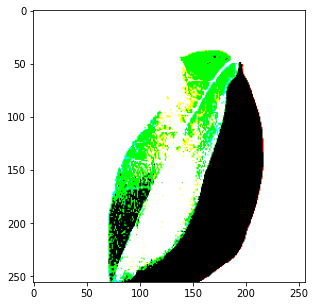

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


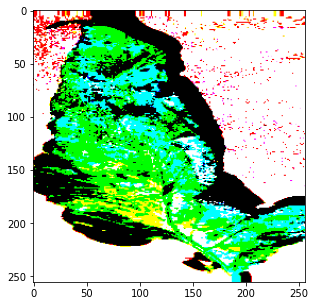

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


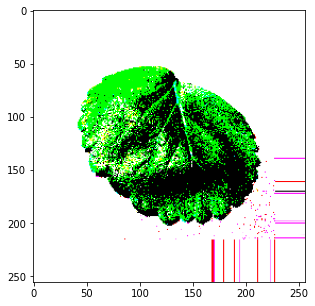

In [16]:
plotImage(t_img[:3], label[:3])

# **Building our model**

In [17]:
from keras.layers import  Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

import keras

In [18]:
base_model= VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [19]:
for layer in base_model.layers:
  layer.trainable= False

In [20]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
X = Flatten()(base_model.output)

X=Dense(units=38, activation='softmax')(X)

# creating Our Model
model = Model(base_model.input , X)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [23]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Early Stopping and Model Check Points

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [25]:
# Early Stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)
# Model check points
mc = ModelCheckpoint(filepath='best_accuracy.h5', min_delta=0.01, patience=3, verbose=1 , save_best_only=True)

cb=[es,mc]

In [26]:
his= model.fit_generator(train,
                         steps_per_epoch=16,
                         epochs=50,
                         verbose=1,
                         callbacks=cb,
                         validation_data=val,
                         validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 28.6193 - accuracy: 0.1719
Epoch 1: val_loss improved from inf to 19.59601, saving model to best_accuracy.h5
16/16 [==============================] - 33s 1s/step - loss: 28.6193 - accuracy: 0.1719 - val_loss: 19.5960 - val_accuracy: 0.3438
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.2419 - accuracy: 0.3750
Epoch 2: val_loss improved from 19.59601 to 11.39689, saving model to best_accuracy.h5
16/16 [==============================] - 18s 1s/step - loss: 16.2419 - accuracy: 0.3750 - val_loss: 11.3969 - val_accuracy: 0.5625
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.1085 - accuracy: 0.5879
Epoch 3: val_loss improved from 11.39689 to 8.48535, saving model to best_accuracy.h5
16/16 [==============================] - 18s 1s/step - loss: 11.1085 - accuracy: 0.5879 - val_loss: 8.4854 - val_accuracy: 0.6562
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 

In [27]:
h = his.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

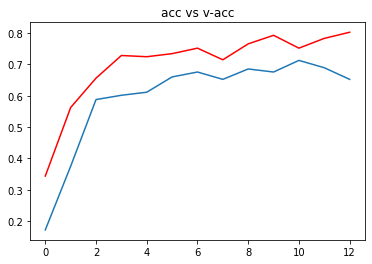

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= 'red')
plt.title('acc vs v-acc')
plt.show()

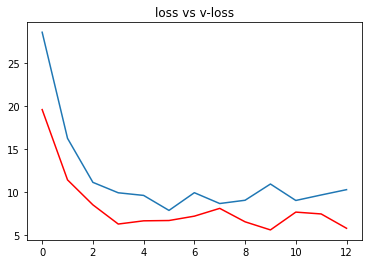

In [29]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= 'red')
plt.title('loss vs v-loss')
plt.show()

Load Best **Model**

In [30]:
from keras.models import load_model
model= load_model("/content/best_accuracy.h5")

In [31]:
acc= model.evaluate_generator(val)[1]

print(f"the accuracy of your model is = {acc*100}% ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


the accuracy of your model is = 77.85681486129761% 


In [32]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [33]:
def prediction(path):
  img= load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im= preprocess_input(i)
  img= np.expand_dims(im, axis=0)
  pred=np.argmax(model.predict(img))
  print(f"the image belongs to { ref[pred] }")
  

In [34]:
path= "/content/test/test/TomatoYellowCurlVirus1.JPG"
prediction(path)

the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [35]:
path= "/content/test/test/PotatoHealthy2.JPG"
prediction(path)

the image belongs to Potato___healthy
